  Sample #  Best Accuracy Best Parameters (Kernel, C)
0       S1         0.5755          (laplacedot, 8.64)
1       S2         0.5667              (rbfdot, 3.88)
2       S3         0.5823              (rbfdot, 5.35)
3       S4         0.5728              (rbfdot, 10.0)
4       S5         0.5830              (rbfdot, 5.68)
5       S6         0.5898           (laplacedot, 7.7)
6       S7         0.5871              (rbfdot, 6.41)
7       S8         0.6048              (rbfdot, 7.87)
8       S9         0.5769              (rbfdot, 6.49)
9      S10         0.5714              (rbfdot, 9.45)


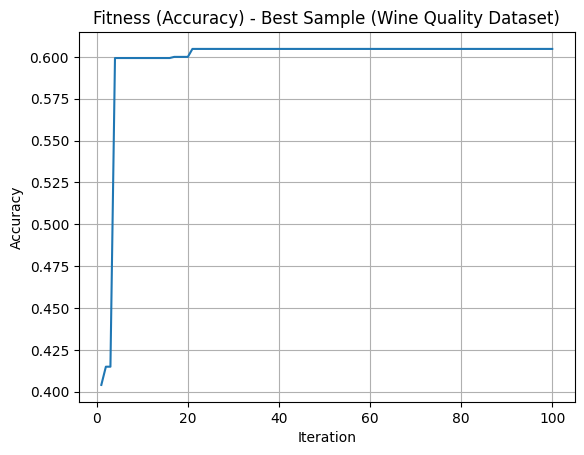

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random
import requests
from io import StringIO

# Load white wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
response = requests.get(url)
df_wine = pd.read_csv(StringIO(response.text), sep=';')

# Features and target
X = df_wine.drop('quality', axis=1).values
y = df_wine['quality'].values

# Kernel mapping
kernel_map = {
    'rbfdot': 'rbf',
    'polydot': 'poly',
    'vanilladot': 'linear',
    'tanhdot': 'sigmoid',
    'laplacedot': 'rbf',
    'anovadot': 'poly'
}
kernel_names = list(kernel_map.keys())

# Result holders
results = []
best_convergence = []
overall_best_acc = -999
overall_best_sample = -1

# Main loop for 10 samples
for sample_index in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample_index)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_fitness = -999
    best_param = None
    convergence = []

    for iteration in range(100):
        kernel_label = random.choice(kernel_names)
        kernel = kernel_map[kernel_label]
        C = random.uniform(0.1, 10)

        try:
            model = SVC(kernel=kernel, C=C)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
        except:
            acc = -999

        if acc > best_fitness:
            best_fitness = acc
            best_param = (kernel_label, round(C, 2))

        convergence.append(best_fitness)

    results.append([f"S{sample_index+1}", round(best_fitness, 4), best_param])

    if best_fitness > overall_best_acc:
        overall_best_acc = best_fitness
        overall_best_sample = sample_index
        best_convergence = convergence

# Save results and plot
df = pd.DataFrame(results, columns=["Sample #", "Best Accuracy", "Best Parameters (Kernel, C)"])
print(df)
df.to_csv("svm_wine_quality_results.csv", index=False)

plt.plot(range(1, 101), best_convergence)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Fitness (Accuracy) - Best Sample (Wine Quality Dataset)")
plt.grid(True)
plt.savefig("svm_wine_quality_convergence.png")
plt.show()
